## Importing the libraries and dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from prettytable import PrettyTable
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bmi.csv')

In [9]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


## Data Preprocessing - encoding object column with dummy variables

In [11]:
data=pd.get_dummies(data, ['Gender'])

In [12]:
data.head()

,Height,Weight,Index,Gender_Female,Gender_Male
0,174,96,4,0,1
1,189,87,2,0,1
2,185,110,4,1,0
3,195,104,3,1,0
4,149,61,3,0,1


## Splitting the dataset 

In [13]:
x=data.drop('Index', axis=1)
y=data['Index']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=42, stratify=y)

## Scaling the data

In [15]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

# Logistic Regression

In [16]:
lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [17]:
Log_reg_score = lr.score(x_train,y_train)
print('Logistic Regression accuracy:', Log_reg_score)

Logistic Regression accuracy: 0.8625


In [18]:
y_pred_lr=lr.predict(x_test)

In [19]:
LR_cm=confusion_matrix(y_test,y_pred_lr)

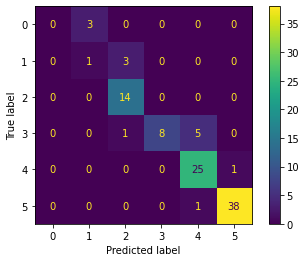

In [20]:
disp=ConfusionMatrixDisplay(confusion_matrix=LR_cm, display_labels=lr.classes_)
disp.plot()
plt.show()

In [21]:
print(classification_report(y_test, y_pred_lr, zero_division=True))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       0.25      0.25      0.25         4
           2       0.78      1.00      0.88        14
           3       1.00      0.57      0.73        14
           4       0.81      0.96      0.88        26
           5       0.97      0.97      0.97        39

    accuracy                           0.86       100
   macro avg       0.80      0.63      0.62       100
weighted avg       0.88      0.86      0.84       100



# Random Forest Classification 

In [22]:
RFC=RandomForestClassifier(n_estimators=500)
RFC.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [23]:
RFC_score = RFC.score(x_test, y_test)
print('Random Forest accuracy:', RFC_score)

Random Forest accuracy: 0.82


In [24]:
y_pred_rf = RFC.predict(x_test)

In [25]:
RF_cm=confusion_matrix(y_test,y_pred_rf)

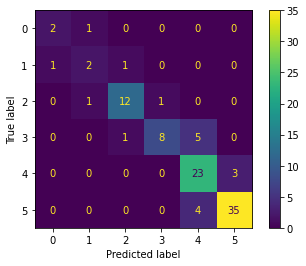

In [26]:
disp=ConfusionMatrixDisplay(confusion_matrix=RF_cm, display_labels=RFC.classes_)
disp.plot()
plt.show()

In [27]:
print(classification_report(y_test, y_pred_rf, zero_division=True))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         4
           2       0.86      0.86      0.86        14
           3       0.89      0.57      0.70        14
           4       0.72      0.88      0.79        26
           5       0.92      0.90      0.91        39

    accuracy                           0.82       100
   macro avg       0.76      0.73      0.74       100
weighted avg       0.83      0.82      0.82       100



# Decision Tree Classification

In [28]:
DT=DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
DT_score = DT.score(x_test, y_test)
print('Decision Tree accuracy:', DT_score)

Decision Tree accuracy: 0.82


In [30]:
y_pred_dt = DT.predict(x_test)

In [31]:
DT_cm=confusion_matrix(y_test,y_pred_dt)

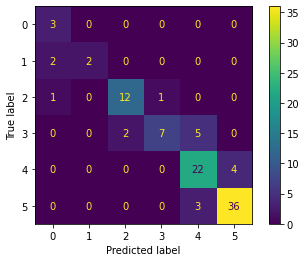

In [32]:
disp=ConfusionMatrixDisplay(confusion_matrix=DT_cm, display_labels=DT.classes_)
disp.plot()
plt.show()

In [33]:
print(classification_report(y_test, y_pred_dt, zero_division=True))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.50      0.67         4
           2       0.86      0.86      0.86        14
           3       0.88      0.50      0.64        14
           4       0.73      0.85      0.79        26
           5       0.90      0.92      0.91        39

    accuracy                           0.82       100
   macro avg       0.81      0.77      0.75       100
weighted avg       0.84      0.82      0.82       100



# SVC Classification

In [34]:
SVC_model=SVC(kernel='linear')


In [35]:
SVC_model.fit(x_train, y_train)

SVC(kernel='linear')

In [36]:
SVC_score = SVC_model.score(x_test, y_test)
print('Support Vector accuracy:', SVC_score)

Support Vector accuracy: 0.91


In [37]:
y_pred_svc = SVC_model.predict(x_test)

In [38]:
SVC_cm=confusion_matrix(y_test,y_pred_svc)

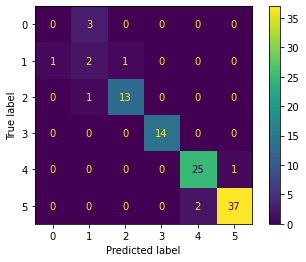

In [39]:
disp=ConfusionMatrixDisplay(confusion_matrix=SVC_cm, display_labels=SVC_model.classes_)
disp.plot()
plt.show()

In [40]:
print(classification_report(y_test, y_pred_svc, zero_division=True))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      0.50      0.40         4
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00        14
           4       0.93      0.96      0.94        26
           5       0.97      0.95      0.96        39

    accuracy                           0.91       100
   macro avg       0.69      0.72      0.71       100
weighted avg       0.90      0.91      0.91       100



# ADA Boosting Classifier

In [41]:
ada_clf=AdaBoostClassifier(n_estimators=1000, random_state=100, learning_rate=3)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=3, n_estimators=1000, random_state=100)

In [42]:
ada_score = ada_clf.score(x_test, y_test)
print('ADA Boost accuracy:', ada_score)

ADA Boost accuracy: 0.57


In [43]:
y_pred_ada = ada_clf.predict(x_test)

In [44]:
ada_cm=confusion_matrix(y_test,y_pred_ada)

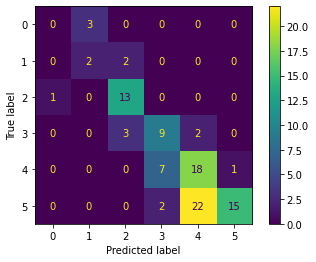

In [45]:
disp=ConfusionMatrixDisplay(confusion_matrix=ada_cm, display_labels=ada_clf.classes_)
disp.plot()
plt.show()

In [46]:
print(classification_report(y_test, y_pred_svc, zero_division=True))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      0.50      0.40         4
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00        14
           4       0.93      0.96      0.94        26
           5       0.97      0.95      0.96        39

    accuracy                           0.91       100
   macro avg       0.69      0.72      0.71       100
weighted avg       0.90      0.91      0.91       100



# Grid Search with Logistic Regression, Random Forest, SVC, and Decision Tree

### Logistic Regression

In [47]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'max_iter': [1000, 5000, 10000],
              'solver': ['lbfgs', 'liblinear', 'sag']} 
  
grid_model_lr = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 1)
  
# fitting the model for grid search
grid_model_lr.fit(x_train, y_train)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'max_iter': [1000, 5000, 10000],
                         'solver': ['lbfgs', 'liblinear', 'sag']},
             verbose=1)

In [48]:
lr_best_score = grid_model_lr.best_score_
print(lr_best_score)

0.93


In [49]:
lr_best_params = grid_model_lr.best_params_
print(lr_best_params)

{'C': 1000, 'max_iter': 1000, 'solver': 'lbfgs'}


### Random Forest

In [50]:
# defining parameter range
param_grid = {'n_estimators': [100, 500, 1000],
              'criterion': ['gini', 'entropy']} 
  
grid_model_rf = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 1)
  
# fitting the model for grid search
grid_model_rf.fit(x_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 500, 1000]},
             verbose=1)

In [51]:
rf_best_score = grid_model_rf.best_score_
print(rf_best_score)

0.8525


In [52]:
rf_best_params = grid_model_rf.best_params_
print(rf_best_params)

{'criterion': 'entropy', 'n_estimators': 500}


### SVC

In [53]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'random_state': [0, 42, 100],
              'kernel': ['linear', 'poly', 'rbf']} 
  
grid_model_svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
  
# fitting the model for grid search
grid_model_svc.fit(x_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'random_state': [0, 42, 100]},
             verbose=1)

In [54]:
svc_best_score = grid_model_svc.best_score_
print(svc_best_score)

0.9400000000000001


In [55]:
svc_best_params = grid_model_svc.best_params_
print(svc_best_params)

{'C': 1000, 'kernel': 'linear', 'random_state': 0}


### Decision Tree

In [56]:
# defining parameter range
param_grid = {'splitter': ['best', 'random'],
              'random_state': [0, 42, 100],
              'criterion': ['gini', 'entropy']} 
  
grid_model_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 1)
  
# fitting the model for grid search
grid_model_dt.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'random_state': [0, 42, 100],
                         'splitter': ['best', 'random']},
             verbose=1)

In [57]:
dt_best_score = grid_model_dt.best_score_
print(dt_best_score)

0.8300000000000001


In [58]:
dt_best_params = grid_model_dt.best_params_
print(dt_best_params)

{'criterion': 'gini', 'random_state': 100, 'splitter': 'random'}


 # ANN with 3 dense layers

In [59]:
n_cols = x_train.shape[1]
n_cols

4

In [60]:
model = Sequential()
model.add(Dense(150, activation='relu', input_shape=(n_cols,)))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1))

In [61]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [62]:
history = model.fit(x_train, y_train, epochs=300, validation_split=.2, verbose=1)

Epoch 1/300
10/10 [==============================] - 1s 29ms/step - loss: 10.6131 - mae: 2.9670 - val_loss: 5.4178 - val_mae: 2.0687
Epoch 2/300
10/10 [==============================] - 0s 5ms/step - loss: 3.1674 - mae: 1.4528 - val_loss: 2.0341 - val_mae: 1.0573
Epoch 3/300
10/10 [==============================] - 0s 5ms/step - loss: 1.2910 - mae: 0.8651 - val_loss: 0.7853 - val_mae: 0.7276
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: 0.7697 - mae: 0.7237 - val_loss: 0.5718 - val_mae: 0.6327
Epoch 5/300
10/10 [==============================] - 0s 6ms/step - loss: 0.5826 - mae: 0.6188 - val_loss: 0.4256 - val_mae: 0.5468
Epoch 6/300
10/10 [==============================] - 0s 8ms/step - loss: 0.4344 - mae: 0.5267 - val_loss: 0.3438 - val_mae: 0.4979
Epoch 7/300
10/10 [==============================] - 0s 5ms/step - loss: 0.3500 - mae: 0.4775 - val_loss: 0.2723 - val_mae: 0.4378
Epoch 8/300
10/10 [==============================] - 0s 5ms/step - loss: 0.2860 -

In [63]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)

print(f"The loss is {loss}, The accuracy is {acc}") 

4/4 [==============================] - 0s 3ms/step - loss: 0.0845 - mae: 0.2064
The loss is 0.08446192741394043, The accuracy is 0.2063591629266739


## Model Scores

In [64]:
myTable=PrettyTable(["Model", "Prediction", "Best Parameters"])

In [65]:
myTable.add_row(["Logistic Regression", lr_best_score, lr_best_params])
myTable.add_row(["Random Forest", rf_best_score, rf_best_params])
myTable.add_row(["Decision Tree", dt_best_score, dt_best_params])
myTable.add_row(["SVC", svc_best_score, svc_best_params])
myTable.add_row(["ADA Boosting", ada_score, "[n_estimators=1000, random_state=100, learning_rate=3]"])
myTable.add_row(["ANN", acc, "3 dense layers, activation='relu', optimizer='adam', loss and metrics = 'mse', epochs=300"])

In [66]:
print(myTable)

+---------------------+--------------------+-------------------------------------------------------------------------------------------+
|        Model        |     Prediction     |                                      Best Parameters                                      |
+---------------------+--------------------+-------------------------------------------------------------------------------------------+
| Logistic Regression |        0.93        |                      {'C': 1000, 'max_iter': 1000, 'solver': 'lbfgs'}                     |
|    Random Forest    |       0.8525       |                       {'criterion': 'entropy', 'n_estimators': 500}                       |
|    Decision Tree    | 0.8300000000000001 |              {'criterion': 'gini', 'random_state': 100, 'splitter': 'random'}             |
|         SVC         | 0.9400000000000001 |                     {'C': 1000, 'kernel': 'linear', 'random_state': 0}                    |
|     ADA Boosting    |        0.57      

## SVC - best model at 94% - confusion matrix and classification report

In [83]:
SVC_best_model=SVC(C=1000, kernel='linear', random_state=0)

In [84]:
SVC_best_model.fit(x_train, y_train)

SVC(C=1000, kernel='linear', random_state=0)

In [85]:
y_pred_best_svc = SVC_best_model.predict(x_test)

In [86]:
SVC_best_cm=confusion_matrix(y_test,y_pred_best_svc)

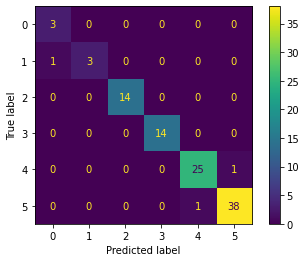

In [88]:
disp=ConfusionMatrixDisplay(confusion_matrix=SVC_best_cm, display_labels=SVC_best_model.classes_)
disp.plot()
plt.show()

In [89]:
print(classification_report(y_test, y_pred_best_svc, zero_division=True))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       0.96      0.96      0.96        26
           5       0.97      0.97      0.97        39

    accuracy                           0.97       100
   macro avg       0.95      0.95      0.94       100
weighted avg       0.97      0.97      0.97       100



## Dataset Used
https://www.kaggle.com/datasets/yasserh/bmidataset